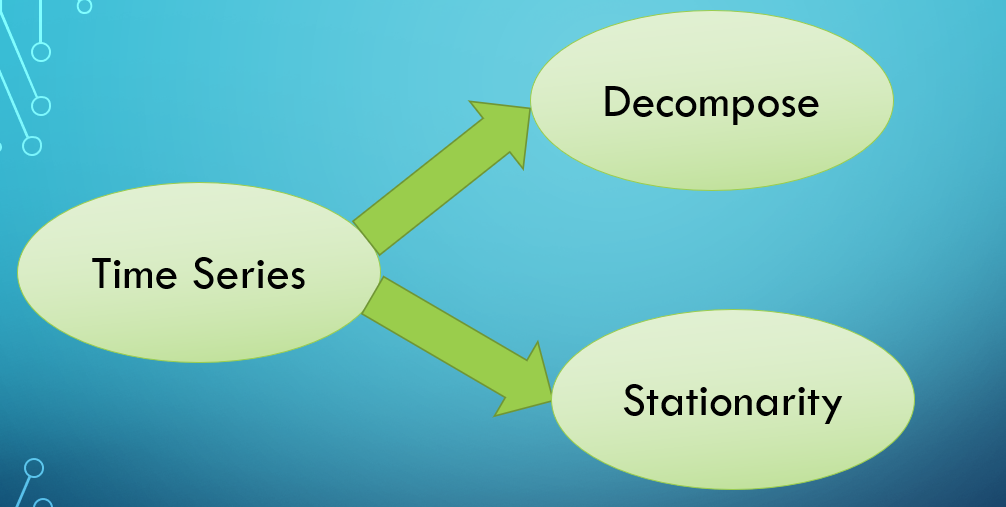

In [2]:
from IPython.display import Image
Image(filename='TimeSeriesImage.png') 

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

# Definition of additive time series:
# Value = Base Level + Trend + Seasonality + Error

# Definition of multiplicative time Series:
# Value = Base Level x Trend x Seasonality x Error

In [4]:
# Import Data -  Australian Drug Sales
data = pd.read_csv(r'C:\Users\teach\Desktop\Qualcomm content\Time_Series\Module 6 and 7\train_data.csv',parse_dates=["Date"],index_col=["Date"])

In [15]:
data.head(10)

Date  count
0 2012-08-25      3
1 2012-08-26      3
2 2012-08-27      2
3 2012-08-28      2
4 2012-08-29      2
5 2012-08-30      3
6 2012-08-31      3
7 2012-09-01      4
8 2012-09-02      4
9 2012-09-03      4

In [16]:
data.reset_index(inplace=True)

In [17]:
data

index       Date  count
0        0 2012-08-25      3
1        1 2012-08-26      3
2        2 2012-08-27      2
3        3 2012-08-28      2
4        4 2012-08-29      2
..     ...        ...    ...
529    529 2014-02-05    254
530    530 2014-02-06    216
531    531 2014-02-07    205
532    532 2014-02-08    159
533    533 2014-02-09    151

[534 rows x 3 columns]

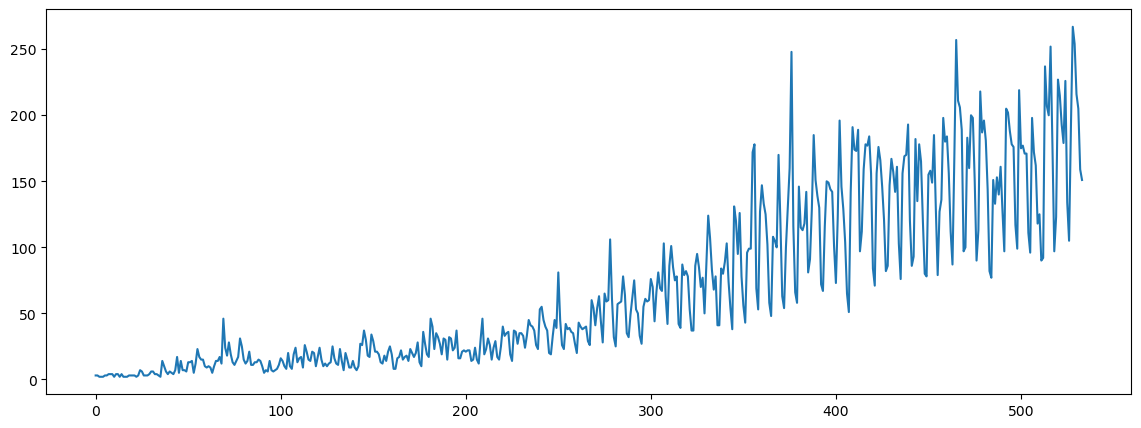

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(data['count'])
plt.show()

In [32]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(data["count"], model='multiplicative',period=12)

# Additive Decomposition
add_result = seasonal_decompose(data['count'], model='additive',period=12)

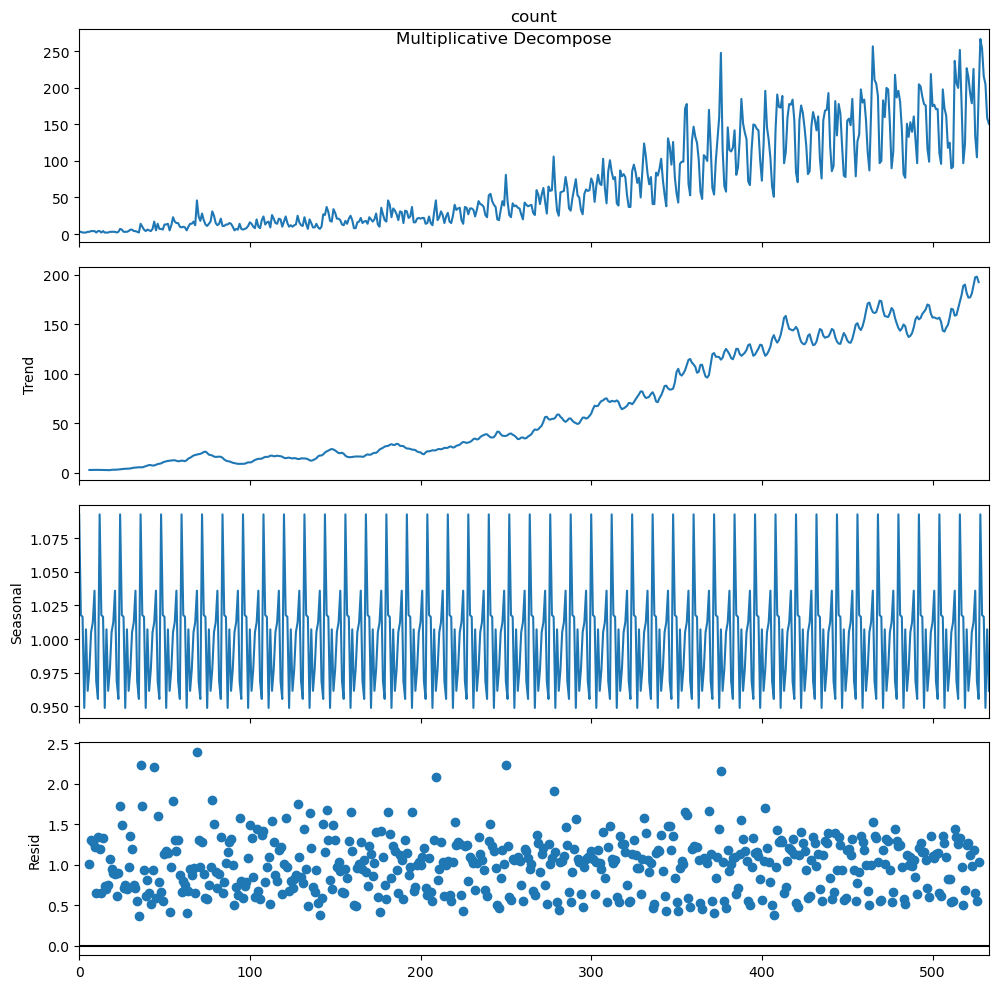

In [33]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)
plt.show()

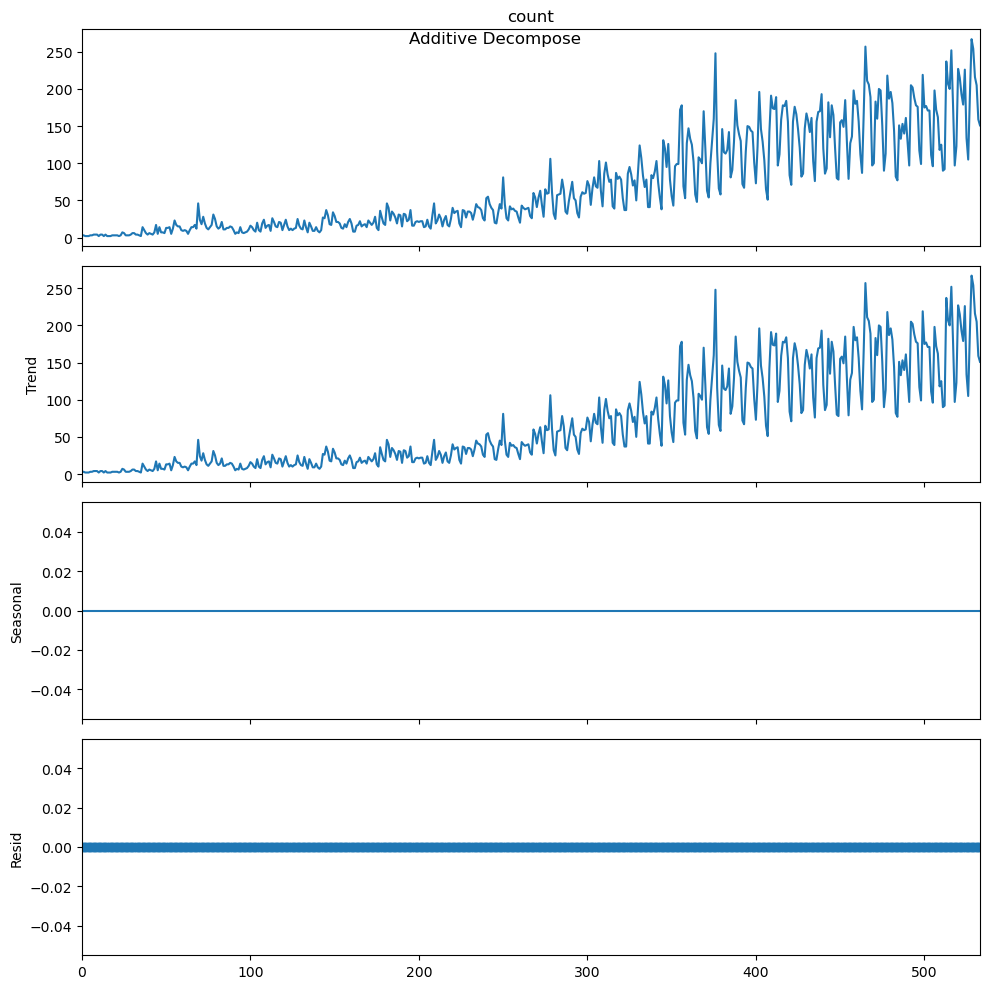

In [25]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

# Definition of stationarity - constant mean and variance

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 0.05 reject null hypothesis
adfuller_result = adfuller(data["count"].values, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.182399112616948
p-value: 0.9958619929912135
Critial Values:
   1%, -3.443136494643789
Critial Values:
   5%, -2.8671794725841147
Critial Values:
   10%, -2.5697736283668187
